#### <p style='text-align: justify;'>1. [Уравнение Михаэлиса-Ментен](https://ru.wikipedia.org/wiki/%D0%A3%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B8%D1%85%D0%B0%D1%8D%D0%BB%D0%B8%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B5%D0%BD%D1%82%D0%B5%D0%BD) — модельное уравнение кинетики ферментативной реакции: $v =\frac{d[P]}{dt} = \frac{V_{max}[S]}{K_m + [S]}$, где $v$ — скорость реакции превращения субстрата $\mathrm{S}$ в продукт $\mathrm{P}$, катализируемой ферментом. $V_{max}$  — максимальная скорость (когда весь фермент связан с $\mathrm{S}$) а константа Михаэлиса, $K_m$, это концентрация субстрата, при которой скорость реакции равна половине своего максимального значения.<br>Постройте график зависимости $v$ от $[S]$ для реакции с $K_m = 0.04\:\mathrm{M}$ и $V_{max}=0.1 \:\mathrm {M\cdot s^{-1}}$ в диапазоне $0 \leqslant [S] \leqslant 0.2$ (можете использовать свой код из задания №2 семинара 9). Добавьте подписи осей.

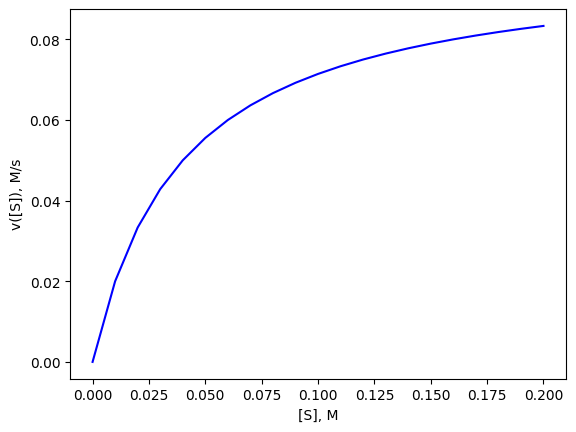

In [3]:
import numpy as np
import matplotlib.pyplot as plt

K = 0.04
V = 0.1
STEP = 0.01
LOWER = 0
UPPER = 0.2

def v(S):
    return (V*S)/(K+S)

lines = []
S = LOWER
while S<= (UPPER + STEP):
    lines.append((S, v(S)))
    S += STEP
x,y = zip(*lines)


plt.plot(x, y, color='b', label='v(S)')
plt.xlabel('[S], M')
plt.ylabel('v([S]), M/s')
plt.show()

#### <p style='text-align: justify;'>2. Постройте [кривую титрования](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D0%B2%D0%B0%D1%8F_%D1%82%D0%B8%D1%82%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F) сильной кислоты (например, $\mathrm{HCl}$) щёлочью ($\mathrm{NaOH}$). (Кривая титрования — зависимость $pH$ раствора от объёма добавленной щелочи.) Входные данные:
|Параметр |Значение |Комментарий                   |
|:------  |--------:|:-----------------------------|
| $V_к$   |$10 \:\mathrm{мл}$| объём титруемой пробы кислоты |
| $N_к$   |$0.12 \:\mathrm M$| концентрация титруемой пробы кислоты |
| $N_щ$   |$0.15 \:\mathrm M$| концентрация раствора щёлочи  |
| $V_{нач}$|$7.5 \:\mathrm{мл}$| начальный объем щёлочи      |
| $∆V$    |$0.004 \:\mathrm{мл}$| объём порции щёлочи, добавляемой за один шаг титрования|
| $V_{кон}$|$8.5 \:\mathrm{мл}$| конечный объем щёлочи         |
    
#### <p style='text-align: justify;'>Предполагается, что к взятому объёму кислоты разом приливают  $V_{нач}$ мл раствора щёлочи, а затем постепенно добавляют щелочь мелкими порциями объемом $∆V$ (например, по каплям), следя за изменением pH, пока общий объём добавленной щелочи не достигнет $V_{кон}$.

#### <p style='text-align: justify;'>Вывод формул для расчёта $pH$ см. в файле `ph.pdf` (можете использовать свой код из задания №3 семинара 3). Добавьте подписи осей.

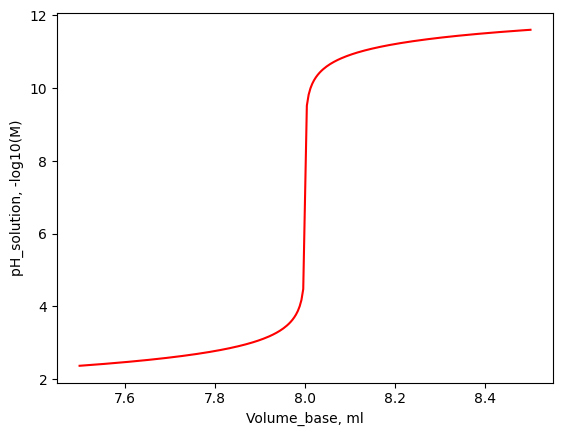

In [ ]:
from math import log10
import matplotlib.pyplot as plt
w=1.008e-14
    
V_a = 10
N_a = 0.12
N_b = 0.15
V_start = 7.5
delta_V = 0.004
V_fin = 8.5
def C_H(p):
    v = p**2/4 + w
    return p/2 + v**0.5

def pH(V_a, N_a, V_b, N_b):
    A = V_a * N_a
    B = V_b * N_b
    V = V_b + V_a
    return -log10(C_H((A-B)/V))

points=[]
V_c = V_start
while V_c <= V_fin:
    points.append((V_c, pH(V_a, N_a, V_c, N_b)))
    V_c += delta_V

x,y=zip(*points)
plt.plot(x,y, color = 'b', label = 'pH')
plt.xlabel('Volume_base, ml')
plt.ylabel('pH_solution, -log10(M)')
plt.show()

#### <p style='text-align: justify;'>3. Нормализованная [гауссова функция](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%BE%D0%B2%D0%B0_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F) со средним значением $\mu$ и стандартным отклонением $\sigma$ выражается формулой $$g(x) = \frac1{\sigma \sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$
#### <p style='text-align: justify;'>На одном графике постройте гауссовы функции для  $\mu=0$ и $\sigma = 1$, $1.5$ и $2$ на интервале $[-10, 10]$. Добавьте легенду.

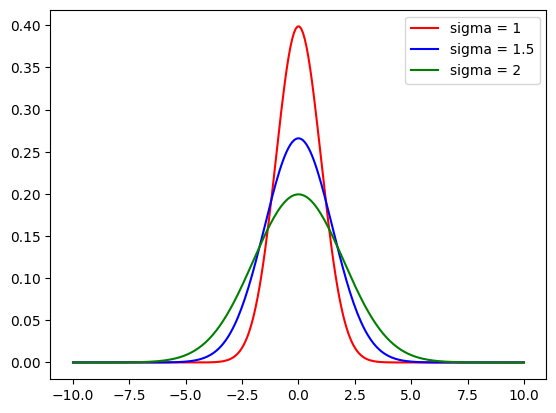

In [1]:
from math import exp, sqrt, pi
from numpy import linspace
import matplotlib.pyplot as plt
def g(x, mu, sigma):
    return exp(-(x-mu)**2/(2*sigma**2))/(sigma*sqrt(2*pi))

x = linspace(-10, 10, 250)
y0 = list(map(lambda t: g(t, 0, 1), x))
y1 = list(map(lambda t: g(t, 0, 1.5), x))
y2 = list(map(lambda t: g(t, 0, 2), x))

plt.plot(x, y0, color = 'r', label = 'sigma = 1')
plt.plot(x, y1, color = 'b', label = 'sigma = 1.5')
plt.plot(x, y2, color = 'g', label = 'sigma = 2')
plt.legend()
plt.show()

####  <p style='text-align: justify;'>4. Размещение семян в цветке подсолненчника моделируется следующим образом. Количество семян $n$, каждое семя $s = 1, 2, ..., n$ размещается на расстоянии от центра $r =\sqrt s$ и повёрнуто на угол $\theta = \frac{2\pi s}\phi$ относительно оси $x$, где $\phi$ — константа золотого сечения $\phi = \dfrac{1 +\sqrt5}2$.<br>Напишите программу, которая запрашивает число семян $500 \leqslant n \leqslant 3000$ и моделирует их размещение в цветке. Чтобы убрать координатные оси, воспользуйтесь функцией `plt.axis('off')`.
#### <p style='text-align: justify;'>* Подберите размер маркера так, чтобы семена почти касались друг друга при любом $n$. Придумайте, как сделать ваш график нагляднее.

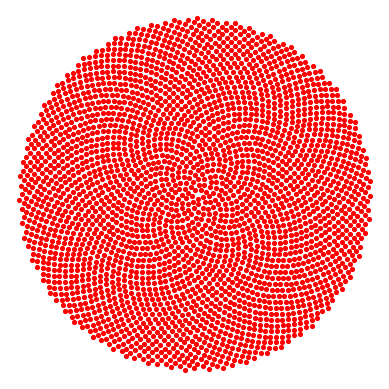

In [11]:
from math import sqrt, pi
import matplotlib.pyplot as plt

phi = (1 + 5**0.5)/2
n = int(input("Введите число n от 500 до 3000"))
if 3000 < n or 500 > n:
    raise ValueError('wrong range')
    
thetas = []
rs = []    
for s in range(1, n + 1):
    thetas.append(2 * pi*s / phi)
    rs.append(sqrt(s))

fig, ax = plt.subplots(subplot_kw={'projection':'polar'})
ax.scatter( thetas, rs, color = 'r', s = 400/n**0.5)
plt.axis('off')
plt.show()